Задачи исследования:
1. Осмотр данных:
    - посмотрим начало и конец датасета
    - сделаем предварительные выводы
    - поищем аномалии

2. Обработка данных:
    - найти и обработать пропуски
    - заменить некорректные типы данных
    - удалить дубликаты
    - подсчитать и добавить цену квадратного метра
    - добавить день недели, месяц и год объявления
    - добавить этаж - первый, последний, другой
    - добавить соотношение жилой и общей площади, а также отношение площади кухни к общей
    
3. Ответы на вопросы:
    - Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?

    - Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

    - Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

    - Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.

    - Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

    - Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

4. Результаты исследования:
    - Общие выводы
    - Рекомендации

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

from scipy import stats as st

### Осмотр данных

In [33]:
df = pd.read_csv('eda_real_estate_data.csv', sep='\t')

In [34]:
df.sample(5)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5397,NaN,3,25000000.0,127.0,2019-01-24T00:00:00,5,3.20,6.0,90.0,6,...,NaN,NaN,Санкт-Петербург,25420.0,4267.0,1.0,432.0,3.0,357.0,8.0
545,NaN,9,4700000.0,23.8,2018-12-28T00:00:00,1,NaN,18.0,20.0,9,...,5.0,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
7366,1564812,8,10430000.0,73.9,2017-05-19T00:00:00,3,3.20,6.0,45.4,2,...,10.4,NaN,Санкт-Петербург,25315.0,4017.0,1.0,284.0,1.0,855.0,360.0
17116,NaN,2,3850000.0,37.5,2015-06-02T00:00:00,1,2.60,18.0,14.5,10,...,9.3,0.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,422.0
6109,1-335-1,4,3250000.0,50.0,2017-08-09T00:00:00,2,2.55,5.0,31.0,1,...,5.0,0.0,Санкт-Петербург,43959.0,16326.0,0.0,NaN,0.0,NaN,7.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   building_series_id    6517 non-null   object 
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  area                  23699 non-null  float64
 13  open_plan             23699 non-null  bool   
 14  kitchen_area          21421 non-null  float64
 15  balcony            

In [36]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,60.348651,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,35.654083,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,12.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,40.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,52.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,69.900000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,900.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Вывод:
- некорректное название столбцов;
- очень много пропущенных значений;
- некорректные типы данных;

### Обработка данных

In [37]:
df.columns.tolist()

['building_series_id',
 'total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'area',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [38]:
# Переименуем столбы
cols = ['building_series_id',
        'total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m',
        'total_floors_in_house',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'area',
        'is_open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'town_name',
        'nearest_airport_distance_m',
        'city_center_distance_m',
        'parks_numbers_within_3km',
        'nearest_park_distance_m',
        'ponds_number_within_3km',
        'nearest_pond_distance_m',
        'days_exposition']
df.set_axis(cols, axis='columns', inplace=True)

In [39]:
# Поменяем логику столбцов на более человечную: где, что, почем, когда и все о парках, водоемах и аэропортах.
df = df[[
 'town_name',  
 'total_area_m2',
 'area',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'building_series_id',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'nearest_airport_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m'
]]

In [40]:
df.head()

,town_name,total_area_m2,area,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.0,108.0,51.0,25.0,2.70,3,NaN,8,16.0,...,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.4,40.4,18.6,11.0,NaN,1,2.0,1,11.0,...,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,56.0,34.3,8.3,NaN,2,0.0,4,5.0,...,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,159.0,NaN,NaN,NaN,3,0.0,9,14.0,...,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,100.0,32.0,41.0,3.03,2,NaN,13,14.0,...,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


In [41]:
# Столбцы 'area' и 'total_area_m2' выглядят одинаковыми, проверим.
test = df['area'] - df['total_area_m2']
test.unique().sum()

0.0

In [42]:
# Удалим area так как этот признак полностью совпадает с total_area_m2
df.drop(['area'], axis=1, inplace=True)

In [43]:
# Поиск пропущенных значений
miss_val = df.isnull().sum()
miss_full = miss_val[miss_val>0].sort_values(ascending=False)
print('Columns with missing values:', len(miss_full))
print(miss_full)

Columns with missing values: 15
is_apartment                  20924
building_series_id            17182
nearest_park_distance_m       15620
nearest_pond_distance_m       14589
number_of_balconies           11519
ceiling_height_m               9195
nearest_airport_distance_m     5542
city_center_distance_m         5519
ponds_number_within_3km        5518
parks_numbers_within_3km       5518
days_exposition                3181
kitchen_area_m2                2278
living_area_m2                 1903
total_floors_in_house            86
town_name                        49
dtype: int64


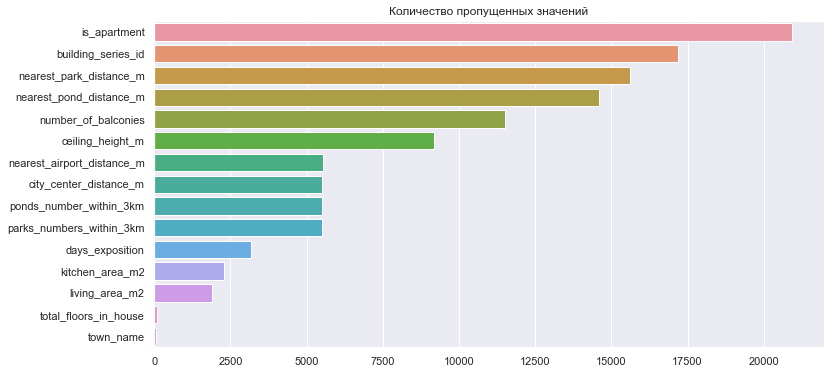

In [44]:
sns.set(rc={'figure.figsize': (12,6)})
miss = sns.barplot(x = miss_full, y = miss_full.index)
miss.set_title('Количество пропущенных значений')
plt.show()

In [46]:
# Пойдем последовательно по столбцам, начнем с наименования города
# Выведем первые 10 населенных пунктов наиболее часто встречаемых в выборке
t_n = df.town_name.value_counts()
town_counts = t_n.nlargest(11).sort_values(ascending=False)
town_counts

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Петергоф               201
Name: town_name, dtype: int64

In [47]:
# Посмотрим сколько всего городов в датасете
len(df['town_name'].unique())

365

In [48]:
# Заменим ё на е для исключения дублей
df['town_name'] = df['town_name'].str.replace('ё', 'е', regex=True)

In [49]:
# Убрали 34 дубля
len(df['town_name'].unique())

331

In [50]:
# Удалим строки без города, они будут мешать в анализе и даже пользователям такие объявления не нужны,
# не понятно, где эта квартира.
df = df.dropna(subset=['town_name'])

## Общее количество этажей в доме и указанный этаж в объявлении

In [51]:
# Количество уникальных типов домов по этажности
df['total_floors_in_house'].nunique()

36

In [52]:
# Количество уникальных значений - номер этажа
df['floor'].nunique()

33

In [53]:
# Медианные значения это 9 этажные дома
df['total_floors_in_house'].median()

9.0

In [57]:
# Количество значений признака в зависимости от этажа в объявлении
f = df.floor.value_counts()
floors = f.nlargest(11).sort_values(ascending=False)
floors

2     3353
3     3065
1     2912
4     2802
5     2616
6     1302
7     1215
8     1083
9     1050
10     687
12     525
Name: floor, dtype: int64

In [58]:
# Количество значений признака в зависимости от этажности дома
t_f = df.total_floors_in_house.value_counts()
total_floors = t_f.nlargest(11).sort_values(ascending=False)
total_floors

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
Name: total_floors_in_house, dtype: int64

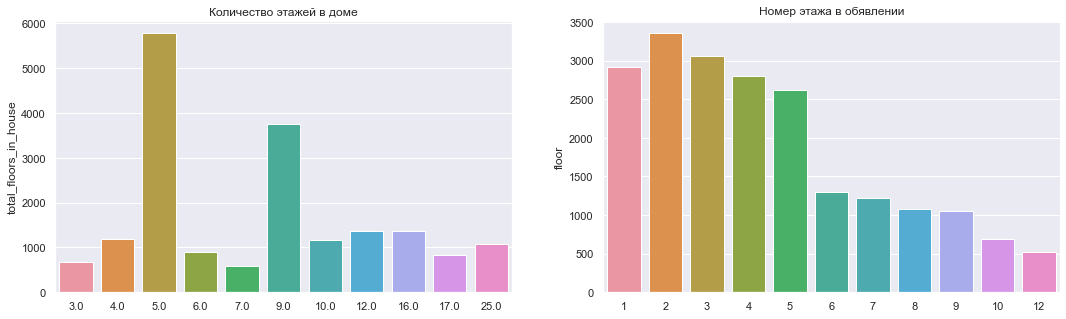

In [59]:
# Визуализируем данные
f, ax = plt.subplots(1,2, figsize = (18,5))
sns.barplot(x = total_floors.index, y = total_floors, ax=ax[0])
ax[0].set_title('Количество этажей в доме')

sns.barplot(x = floors.index, y = floors, ax=ax[1])
ax[1].set_title('Номер этажа в обявлении')
plt.show()

Вывод:
- всего в нашей выборке представлено 36 типов этажности домов;
- подавляющее большинство это "пятиэтажки", медиана - 9 этажные дома;
- больше всего объявлений сосредоточены до 5 этажа включительно;
- пяти этажные дома более распространены нежели 9 этажные;

## Жилая площадь и кухонная площадь

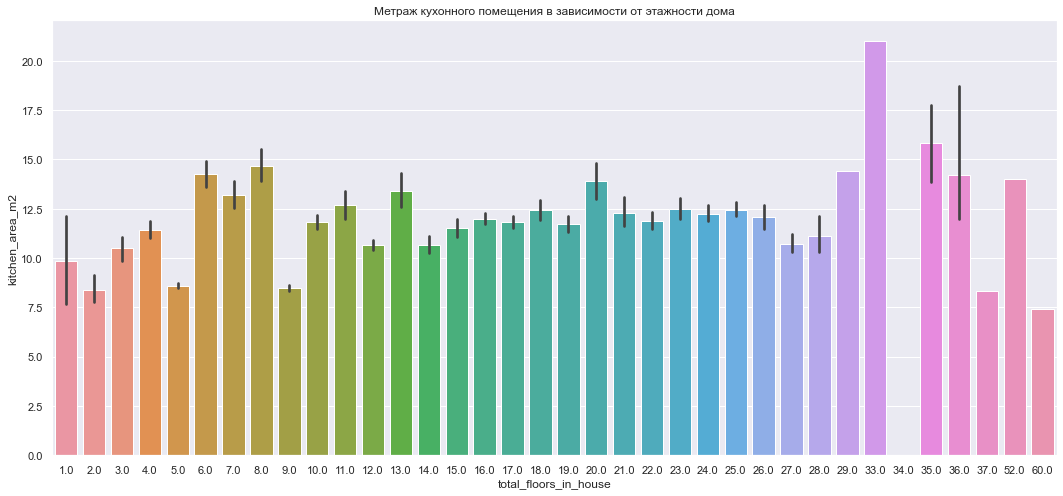

In [60]:
# Взглянем зависит ли площадь кухонного и жилого помещения от этажности дома
sns.set(rc={'figure.figsize': (18,8)})
kitchen = sns.barplot(x = df.total_floors_in_house, y = df.kitchen_area_m2)
kitchen.set_title('Метраж кухонного помещения в зависимости от этажности дома')
plt.show()

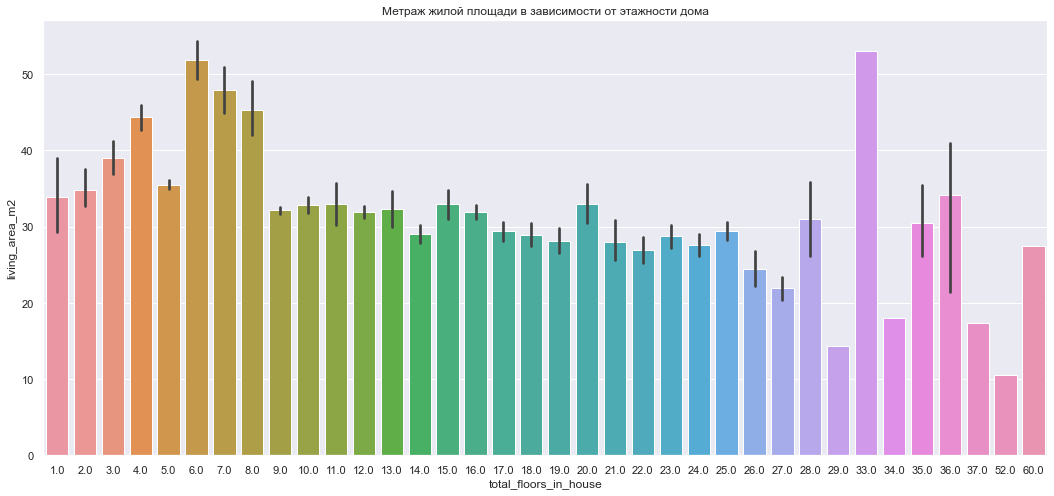

In [62]:
sns.set(rc={'figure.figsize': (18,8)})
total = sns.barplot(x = df.total_floors_in_house, y = df.living_area_m2)
total.set_title('Метраж жилой площади в зависимости от этажности дома')
plt.show()

In [63]:
# Посмотрим в каких домах больше всего отсутсвуют значения по кухней в выборке
miss_kitchen_area = df['kitchen_area_m2'].isin(['NaN'])
df[miss_kitchen_area]['total_floors_in_house'].value_counts().sort_values(ascending = False).nlargest(11)

5.0     525
9.0     254
25.0    142
16.0    134
4.0     120
12.0    119
10.0    107
18.0     83
17.0     77
3.0      75
6.0      65
Name: total_floors_in_house, dtype: int64

In [64]:
# Посмотрим в каких домах больше всего отсутсвуют значения по жилой площади в выборке
miss_living_area = df['living_area_m2'].isin(['NaN'])
df[miss_living_area]['total_floors_in_house'].value_counts().sort_values(ascending = False).nlargest(11)

5.0     470
9.0     217
4.0     121
25.0    107
16.0    107
10.0     94
12.0     93
3.0      57
17.0     56
6.0      51
7.0      44
Name: total_floors_in_house, dtype: int64

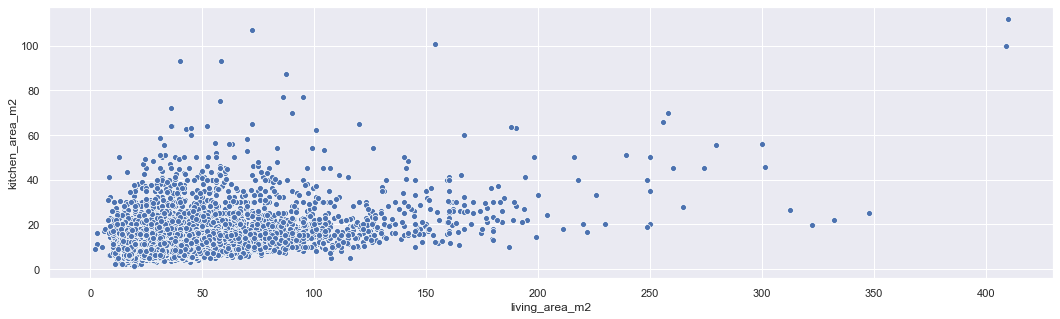

In [65]:
# Взглянем на зависимость жилой и кухонной площадей между друг другом
sns.set(rc={'figure.figsize': (18,5)})
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="living_area_m2", y="kitchen_area_m2",
                     palette=cmap, sizes=(10, 200),
                     data=df)
plt.show()

Вывод:
- Линейной зависимости между признаками нет

In [66]:
df.groupby('total_floors_in_house').aggregate({'kitchen_area_m2':'median',
                                              'living_area_m2':'median'})

,kitchen_area_m2,living_area_m2
total_floors_in_house,,
1.0,9.10,31.800
2.0,7.00,29.500
3.0,8.50,32.000
4.0,9.80,37.000
5.0,7.00,30.100
6.0,11.00,43.000
7.0,10.70,38.500
8.0,12.55,36.000
9.0,7.60,30.000


## Дата опубликования первого объявления и количество дней после публикации

In [67]:
# Преобразуем столбец first_day_exposition в нормальный формат даты
import datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [68]:
# Добавим столбцы c днем, месяцем и годом и удалим столбец с количеством дней от начала до конца публикации (слишком много пропусков)
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year
df.drop(['days_exposition'], axis=1, inplace=True)

In [69]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,...,first_day_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,day_of_week_exposition,month_exposition,year_exposition
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,1564812,...,2019-03-07,16028.0,18863.0,1.0,482.0,2.0,755.0,Thursday,March,2019
1,поселок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,2018-12-04,18603.0,12817.0,0.0,NaN,0.0,NaN,Tuesday,December,2018
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,Сталинский,...,2015-08-20,13933.0,21741.0,1.0,90.0,2.0,574.0,Thursday,August,2015
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,2015-07-24,6800.0,28098.0,2.0,84.0,3.0,234.0,Friday,July,2015
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,2018-06-19,8098.0,31856.0,2.0,112.0,1.0,48.0,Tuesday,June,2018


## Расстояния до до центра, аэропорта, парков и прудов

In [70]:
# Заменим расстояния до центра, аэропорта, парков и прудов в км
distance_m = ['city_center_distance_m',
            'nearest_airport_distance_m',
            'nearest_park_distance_m',
            'nearest_pond_distance_m']
distance_km = ['city_center_distance_km',
            'nearest_airport_distance_km',
            'nearest_park_distance_km',
            'nearest_pond_distance_km']

In [71]:
df[distance_km] = df[distance_m].apply(lambda x: x/1000, axis=0)
df.drop(distance_m, axis=1, inplace=True)

In [72]:
df.sample(5)

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,...,first_day_exposition,parks_numbers_within_3km,ponds_number_within_3km,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
23622,Выборг,114.0,81.3,12.0,3.15,4,NaN,4,4.0,NaN,...,2018-08-13,NaN,NaN,Monday,August,2018,NaN,NaN,NaN,NaN
23399,Санкт-Петербург,97.0,61.4,9.5,3.50,3,NaN,2,7.0,NaN,...,2017-01-11,1.0,2.0,Wednesday,January,2017,1.463,17.863,0.663,0.189
17961,Санкт-Петербург,13.0,NaN,NaN,2.60,1,NaN,1,9.0,1564806,...,2017-12-03,0.0,1.0,Sunday,December,2017,15.945,14.350,NaN,0.185
13049,поселок Мурино,40.8,18.0,12.0,2.65,1,NaN,21,27.0,NaN,...,2017-09-05,NaN,NaN,Tuesday,September,2017,NaN,NaN,NaN,NaN
22918,поселок Перово,54.0,32.0,9.0,NaN,2,2.0,4,5.0,NaN,...,2019-04-17,NaN,NaN,Wednesday,April,2019,NaN,NaN,NaN,NaN


## Парки и пруды в расстоянии 3 км от квартир

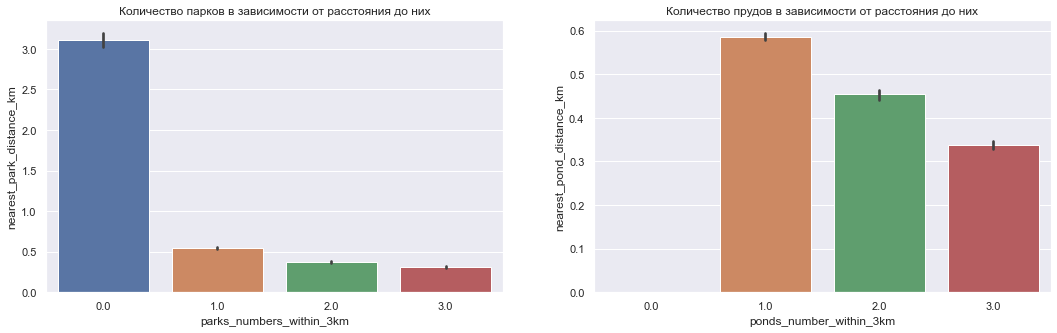

In [73]:
f, ax = plt.subplots(1,2, figsize = (18,5))
sns.barplot(x = df.parks_numbers_within_3km, y = df.nearest_park_distance_km, ax=ax[0])
ax[0].set_title('Количество парков в зависимости от расстояния до них')

sns.barplot(x = df.ponds_number_within_3km, y = df.nearest_pond_distance_km, ax=ax[1])
ax[1].set_title('Количество прудов в зависимости от расстояния до них')
plt.show()

Вывод:
- сразу бросается в глаза одно наблюдение: есть несколько объектов где нет в радиуса 3-х км ни одного парка, но при этом расстояние до них указано, но даже видно по графику, что это парки с расстоянием до них больше 3 км

In [74]:
# Найдем пакрки, до которых расстояние превышает 3 км
df[(df['parks_numbers_within_3km']==0.0) & (df['nearest_park_distance_km']>3.0)]

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,...,first_day_exposition,parks_numbers_within_3km,ponds_number_within_3km,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
1590,Санкт-Петербург,70.0,37.0,10.0,NaN,2,0.0,13,18.0,Кирп.Монолит,...,2017-07-11,0.0,1.0,Tuesday,July,2017,9.791,14.878,3.064,0.264
10959,Санкт-Петербург,31.1,17.7,5.5,NaN,1,0.0,2,5.0,NaN,...,2017-03-21,0.0,1.0,Tuesday,March,2017,9.734,14.821,3.190,0.431
19208,Санкт-Петербург,187.0,80.0,17.0,3.0,5,1.0,2,2.0,NaN,...,2017-10-12,0.0,3.0,Thursday,October,2017,8.656,36.805,3.013,0.537
19430,Санкт-Петербург,30.5,16.5,5.5,2.6,1,NaN,1,5.0,1564812.0,...,2018-02-22,0.0,1.0,Thursday,February,2018,9.734,14.821,3.190,0.431


In [75]:
# Заменим пропущенные значения на 0, 
# так как правило там где нет парков в ближайшей доступности и не указано расстояние до них
df['parks_numbers_within_3km'] = df['parks_numbers_within_3km'].fillna(0)
df['ponds_number_within_3km'] = df['ponds_number_within_3km'].fillna(0)
df['nearest_park_distance_km'] = df['nearest_park_distance_km'].fillna(0)
df['nearest_pond_distance_km'] = df['nearest_pond_distance_km'].fillna(0)

In [76]:
# Переведем столбцы с количеством парков и прудов в тип int и отсеим дробную часть
df['parks_numbers_within_3km'] = df['parks_numbers_within_3km'].astype(int)
df['ponds_number_within_3km'] = df['ponds_number_within_3km'].astype(int)

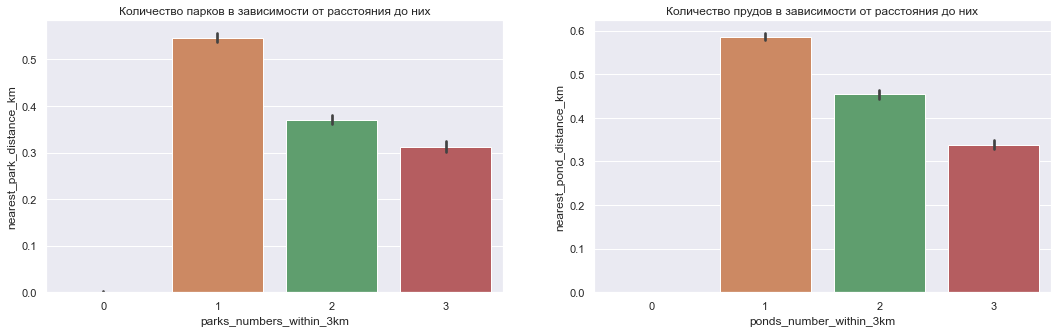

In [77]:
f, ax = plt.subplots(1,2, figsize = (18,5))
sns.barplot(x = df.parks_numbers_within_3km, y = df.nearest_park_distance_km, ax=ax[0])
ax[0].set_title('Количество парков в зависимости от расстояния до них')

sns.barplot(x = df.ponds_number_within_3km, y = df.nearest_pond_distance_km, ax=ax[1])
ax[1].set_title('Количество прудов в зависимости от расстояния до них')
plt.show()

## Апартаменты, студии, квартиры открытой планировки

In [78]:
# Разберемся со статусами студии, апартаментов и открытой планировки
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [79]:
# Nan заменим на False, так как объекты жилового фонда
df['is_apartment'] = df['is_apartment'].fillna(0)

In [80]:
# Переведем булев тип к цифровому для проведения дальнейших расчетов
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})

In [81]:
# Проведем все тоже самое с остальными признаками
df['is_studio'] = df['is_studio'].map({True: 1, False: 0})
df['is_open_plan'] = df['is_open_plan'].map({True: 1, False: 0})

In [82]:
df.columns.tolist()

['town_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'building_series_id',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_images',
 'last_price',
 'first_day_exposition',
 'parks_numbers_within_3km',
 'ponds_number_within_3km',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'nearest_park_distance_km',
 'nearest_pond_distance_km']

In [83]:
df = df[[
 'town_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'building_series_id',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_images',
 'last_price',
 'first_day_exposition',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'parks_numbers_within_3km',
 'nearest_park_distance_km',
 'ponds_number_within_3km',
 'nearest_pond_distance_km'
]]

In [84]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,...,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,1564812,...,2019-03-07,Thursday,March,2019,16.028,18.863,1,0.482,2,0.755
1,поселок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,2018-12-04,Tuesday,December,2018,18.603,12.817,0,0.000,0,0.000
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,Сталинский,...,2015-08-20,Thursday,August,2015,13.933,21.741,1,0.090,2,0.574
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,2015-07-24,Friday,July,2015,6.800,28.098,2,0.084,3,0.234
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,2018-06-19,Tuesday,June,2018,8.098,31.856,2,0.112,1,0.048


In [85]:
# Добавим цену квадратного метра
df['price_per_meter'] = df['last_price'] / df['total_area_m2']
df['price_per_meter'] = df['price_per_meter'].round(decimals=2)

In [86]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,...,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,price_per_meter
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,1564812,...,Thursday,March,2019,16.028,18.863,1,0.482,2,0.755,120370.37
1,поселок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,Tuesday,December,2018,18.603,12.817,0,0.000,0,0.000,82920.79
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,Сталинский,...,Thursday,August,2015,13.933,21.741,1,0.090,2,0.574,92785.71
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,Friday,July,2015,6.800,28.098,2,0.084,3,0.234,408176.10
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,Tuesday,June,2018,8.098,31.856,2,0.112,1,0.048,100000.00


## Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

In [87]:
df[['total_area_m2', 'living_area_m2','kitchen_area_m2','ceiling_height_m','number_of_rooms',
    'total_floors_in_house','last_price', 'price_per_meter']].describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,total_floors_in_house,last_price,price_per_meter
count,23650.000000,21752.000000,21381.000000,14490.000000,23650.000000,23565.000000,2.365000e+04,2.365000e+04
mean,60.329069,34.448356,10.566403,2.771287,2.070106,10.675875,6.541127e+06,9.943225e+04
std,35.661808,22.037664,5.901753,1.261593,1.078620,6.594823,1.089640e+07,5.033794e+04
min,12.000000,2.000000,1.300000,1.000000,0.000000,1.000000,1.219000e+04,1.118300e+02
25%,40.000000,18.600000,7.000000,2.520000,1.000000,5.000000,3.400000e+06,7.661496e+04
50%,52.000000,30.000000,9.100000,2.650000,2.000000,9.000000,4.650000e+06,9.500000e+04
75%,69.700000,42.300000,12.000000,2.800000,3.000000,16.000000,6.799000e+06,1.142742e+05
max,900.000000,409.700000,112.000000,100.000000,19.000000,60.000000,7.630000e+08,1.907500e+06


Вывод:
- общая площадь квартиры в 900 квадратных метров (соотвественно жилая площадь - 409.7 и кухня в 112 метров) - это что же за замок такой???
- высота потолков 100 метров;
- количество этажей 60;

## Каковы типичные параметры продаваемых квартир (например, площадь, цена)?

Так как в нашей выборке есть явные аномальные значения, то можно поступить 2 способами:
1. Составить функцию выявления выбросов и удаления них, после применить функцию к каждому признаку и высчитать среднее;
2. Посчитать медиану каждого признака, так как медианное значение менее подвержено выбросам

Пойдем по пути наименьшего сопротивления, т.е. по пути №2

In [88]:
ratio_total_area = 100 - (df.total_area_m2.median()/df.total_area_m2.mean())*100
ratio_living_area = 100 - (df.living_area_m2.median()/df.living_area_m2.mean())*100
ratio_kitchen_area = 100 - (df.kitchen_area_m2.median()/df.kitchen_area_m2.mean())*100
ratio_ceiling_h = 100 - (df.ceiling_height_m.median()/df.ceiling_height_m.mean())*100
ratio_total_floors_in_house = 100 - (df.total_floors_in_house.median()/df.total_floors_in_house.mean())*100
ratio_last_price = 100 - (df.last_price.median()/df.last_price.mean())*100
ratio_price_per_m = 100 - (df.price_per_meter.median()/df.price_per_meter.mean())*100

typical_value = pd.DataFrame({
    ' Признаки':['Общая площадь квартиры',
              'Жилая площадь','Кухонная площадь','Высота потолков','Общее количество этажей в доме',
              'Стоимость квартиры','Стоимость м2'],
    'Значения с "аномалиями"':[df.total_area_m2.mean(), df.living_area_m2.mean(), 
                               df.kitchen_area_m2.mean(), df.ceiling_height_m.mean(), 
                               df.total_floors_in_house.mean(), df.last_price.mean(),
                              df.price_per_meter.mean()],
    'Значения без "аномалий"':[df.total_area_m2.median(), df.living_area_m2.median(), 
                               df.kitchen_area_m2.median(), df.ceiling_height_m.median(), 
                               df.total_floors_in_house.median(), df.last_price.median(),
                              df.price_per_meter.median()],
    '%':[ratio_total_area, ratio_living_area, ratio_kitchen_area, ratio_ceiling_h, ratio_total_floors_in_house,
        ratio_last_price, ratio_price_per_m]
}).round(decimals=2)
typical_value

,Признаки,"Значения с ""аномалиями""","Значения без ""аномалий""",%
0,Общая площадь квартиры,60.33,52.00,13.81
1,Жилая площадь,34.45,30.00,12.91
2,Кухонная площадь,10.57,9.10,13.88
3,Высота потолков,2.77,2.65,4.38
4,Общее количество этажей в доме,10.68,9.00,15.70
5,Стоимость квартиры,6541126.90,4650000.00,28.91
6,Стоимость м2,99432.25,95000.00,4.46


Вывод:
- Самый высокий процент отличий в стоимости квартиры (на 29%)

## Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

In [89]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,...,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,price_per_meter
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,1564812,...,Thursday,March,2019,16.028,18.863,1,0.482,2,0.755,120370.37
1,поселок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,Tuesday,December,2018,18.603,12.817,0,0.000,0,0.000,82920.79
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,Сталинский,...,Thursday,August,2015,13.933,21.741,1,0.090,2,0.574,92785.71
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,Friday,July,2015,6.800,28.098,2,0.084,3,0.234,408176.10
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,Tuesday,June,2018,8.098,31.856,2,0.112,1,0.048,100000.00


In [90]:
# Добавим этажи
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors_in_house']:
        return 'последний'
    else:
        return 'другой'

In [91]:
df['floor_status'] = df.apply(floor_status, axis=1)

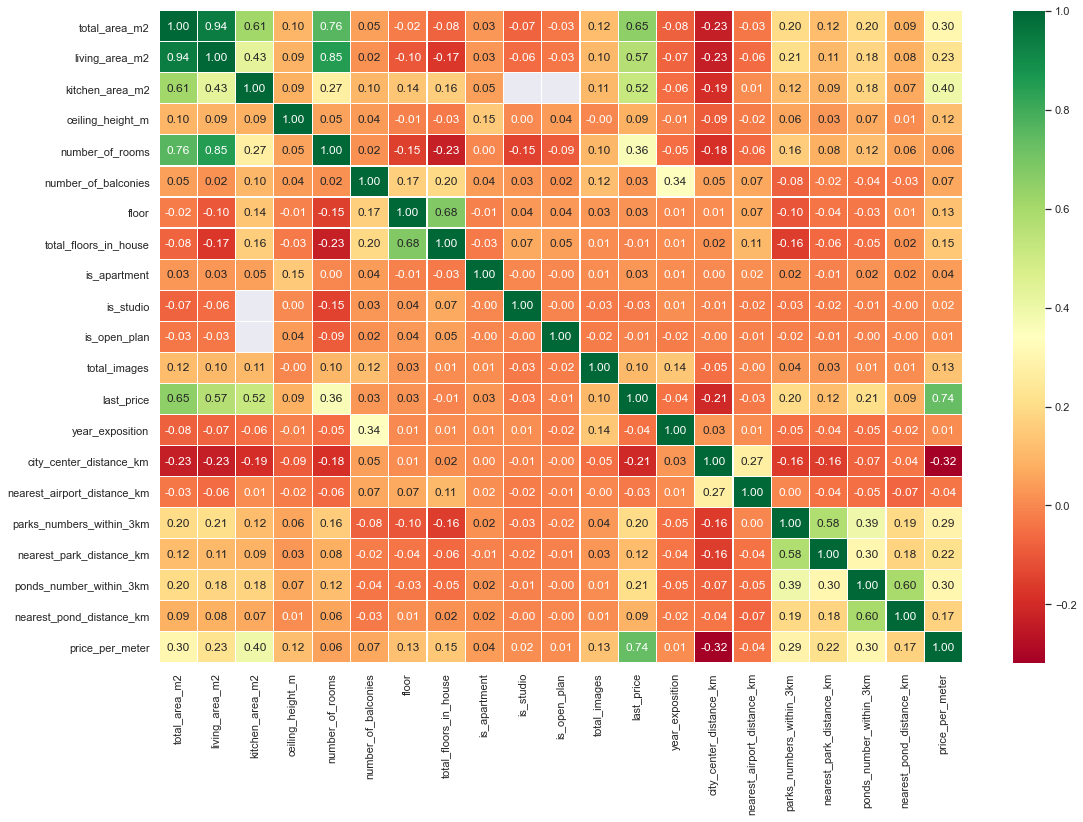

In [92]:
# Составим корреляционную матрицу с рассчитанным коэффициентом корреляции Пирсона
sns.set(rc={'figure.figsize': (18,12)})
sns.heatmap (df.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, fmt = '.2f')
plt.show()

Цена квартиры зависит:
- в первую очередь от общей площади квартиры;
- то же самое от жилой площади и кухонной;
- от количества комнат тоже зависит.

Цена квадратного метра зависит:
- в большей степени от кухонной площади чем от общей площади квартиры;
- также есть пусть и не большая, но зависимость от наличия парков и прудов в ближайшей доступности;
- ну и имеет место быть отрицаательная зависимость между расстоянием до центра и ценой за метр квадратный (т.е. чем ближе к центру тем стоимость дороже - все логично)

Остальные признаки особого влияния не оказывают

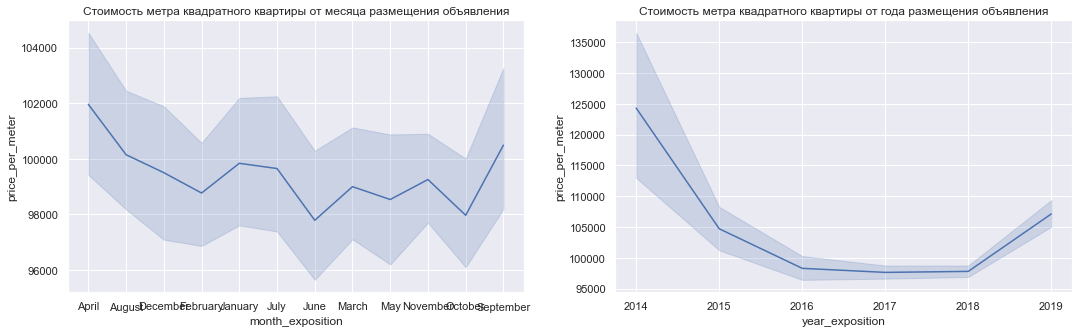

In [93]:
f, ax = plt.subplots(1,2, figsize = (18,5))
sns.lineplot(df.month_exposition, df.price_per_meter, ax=ax[0])
ax[0].set_title('Стоимость метра квадратного квартиры от месяца размещения объявления')

sns.lineplot(df.year_exposition, df.price_per_meter, ax=ax[1])
ax[1].set_title('Стоимость метра квадратного квартиры от года размещения объявления')
plt.show()

Вывод:
- в июне и октябре наблюдаются наименьший ценновой диапозон;
- стоимость квадратного метра на квартиры с 2014 года по 2016 года резко упало со 125тр за м2 до 99тр за м2 - по всей видимости это связано с очередным экономическим кризисом в нашей стране и цена таковой держалась до самого ц018 года, далее цена пошла на повышение

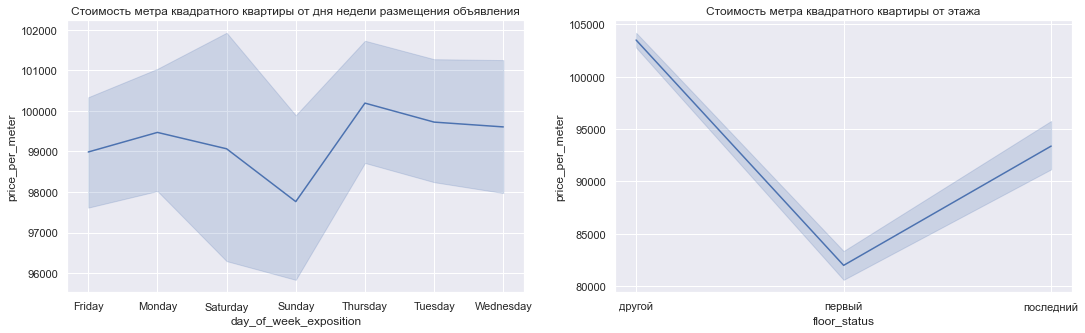

In [94]:
f, ax = plt.subplots(1,2, figsize = (18,5))
sns.lineplot(df.day_of_week_exposition, df.price_per_meter, ax=ax[0])
ax[0].set_title('Стоимость метра квадратного квартиры от дня недели размещения объявления')

sns.lineplot(df.floor_status, df.price_per_meter, ax=ax[1])
ax[1].set_title('Стоимость метра квадратного квартиры от этажа')
plt.show()

Вывод:
- интересная зависимость, что по воскресеньем ценник гораздо ниже, чем в остальные дни недели, трудно сказать с чем это может быть связано;
- ну а стоимотсь за первый этаж гораздо ниже, чем остальные это вполне законемерный факт

## Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений.¶

In [95]:
top_10 = df.groupby('town_name') \
.agg({'year_exposition':'count',
    'price_per_meter':'median'}) \
.sort_values(by='year_exposition', ascending=False).head(11)

In [96]:
top_10.sort_values(by='price_per_meter', ascending=False).head(11)

,year_exposition,price_per_meter
town_name,,
Санкт-Петербург,15721,104761.900
Пушкин,369,100000.000
деревня Кудрово,299,91860.470
поселок Парголово,327,91642.860
поселок Мурино,556,85878.465
Петергоф,201,82142.860
поселок Шушары,440,76876.175
Колпино,338,74723.745
Гатчина,307,67796.610


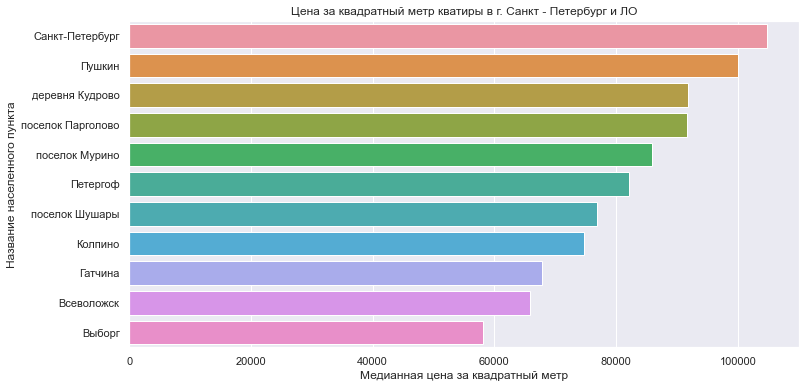

In [97]:
top_10 = top_10.sort_values(by='price_per_meter', ascending=False)
sns.set(rc={'figure.figsize': (12,6)})
t_10 = sns.barplot(x = top_10.price_per_meter, y = top_10.index)
t_10.set_title('Цена за квадратный метр кватиры в г. Санкт - Петербург и ЛО')
t_10.set(ylabel="Название населенного пункта",
       xlabel="Медианная цена за квадратный метр")
plt.show()

Вывод:
- Самая высокая цена за квадратный метр жилой площади в Санкт - Петербурге, самая низкая в Выборге

## Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

In [99]:
# Посчитаем типичные значения квантилей по признаку близости центра
df['city_center_distance_km'].quantile([0.25,0.5,0.75,1])

0.25     9.241
0.50    13.105
0.75    16.293
1.00    65.968
Name: city_center_distance_km, dtype: float64

In [100]:
# Определим границу близости к центру как менее 9 км (требование по количеству объявлений проходит)
df.query('city_center_distance_km < 9.0')['city_center_distance_km'].count()

4382

In [101]:
# Добавим этажи
def city_center (row):
    if row['city_center_distance_km'] < 9.0:
        return 'Близко к центру'
    else:
        return 'Далеко от центра'

In [102]:
df['city_center'] = df.apply(city_center, axis=1)

In [103]:
city_center_in_9_km = df.query('city_center_distance_km < 9.0')

In [104]:
# Подсчитаем корреляцию для признаков типичных квартир в центре
corr_city_in_center = city_center_in_9_km.corr()
print(corr_city_in_center.nlargest(6, 'last_price')['last_price'])

last_price         1.000000
price_per_meter    0.776956
total_area_m2      0.641044
living_area_m2     0.545322
kitchen_area_m2    0.506961
number_of_rooms    0.345090
Name: last_price, dtype: float64


In [105]:
city_center_out_9_km = df.query('city_center_distance_km > 9.0')

In [106]:
# Подсчитаем корреляцию для признаков типичных квартир за центром
corr_city_out_center = city_center_out_9_km.corr()
print(corr_city_out_center.nlargest(6, 'last_price')['last_price'])

last_price         1.000000
total_area_m2      0.819791
living_area_m2     0.698790
kitchen_area_m2    0.639293
number_of_rooms    0.518997
price_per_meter    0.518153
Name: last_price, dtype: float64


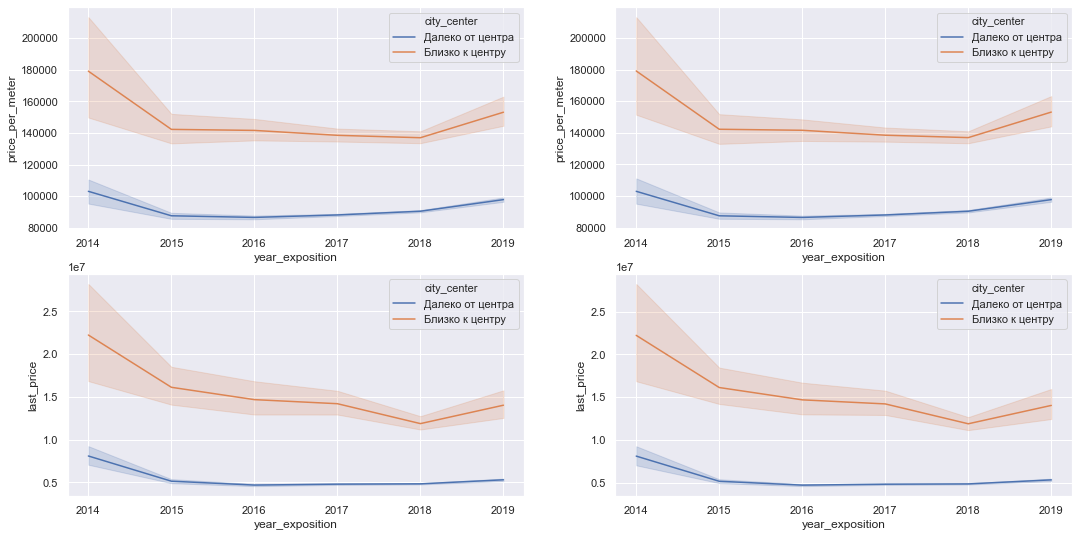

In [107]:
f, ax = plt.subplots(2,2, figsize = (18,9))
sns.lineplot(x=df.year_exposition, y=df.price_per_meter,
             hue=df.city_center, ax=ax[0,0])

sns.lineplot(x=df.year_exposition, y=df.price_per_meter,
             hue=df.city_center, ax=ax[0,1])

sns.lineplot(x=df.year_exposition, y=df.last_price,
             hue=df.city_center, ax=ax[1,0])

sns.lineplot(x=df.year_exposition, y=df.last_price,
             hue=df.city_center, ax=ax[1,1])
plt.show()

In [108]:
corr_center_table = pd.DataFrame({
    'Корреляция признаков ближе к центру':  corr_city_in_center.iloc[12],
    'Корреляция признаков дальше от центра': corr_city_out_center.iloc[12]
}).reset_index()

In [109]:
corr_center_table.style.background_gradient('RdYlGn')

,index,Корреляция признаков ближе к центру,Корреляция признаков дальше от центра
0,total_area_m2,0.641044,0.819791
1,living_area_m2,0.545322,0.698790
2,kitchen_area_m2,0.506961,0.639293
3,ceiling_height_m,0.042875,0.087882
4,number_of_rooms,0.345090,0.518997
5,number_of_balconies,0.054057,0.228466
6,floor,0.106710,0.116915
7,total_floors_in_house,0.024109,0.136178
8,is_apartment,0.034944,0.018532
9,is_studio,-0.023843,-0.054561


Вывод:
Для квартир расположенных в центре наибольшее влияние оказывают:
- цена за квадратный метр;
- общая площадь квартиры (в т.ч. жилая и кухонная площади);
- количество комнат;

Для квартир удаленных от центра:
- общая площадь квартиры (в т.ч. жилая и кухонная площади);
- цена за квадратный метр;
- количество комнат;
- количество балконов;

## Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

In [110]:
list(df.columns)

['town_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'building_series_id',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_images',
 'last_price',
 'first_day_exposition',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'parks_numbers_within_3km',
 'nearest_park_distance_km',
 'ponds_number_within_3km',
 'nearest_pond_distance_km',
 'price_per_meter',
 'floor_status',
 'city_center']

In [111]:
# Подсчитаем корреляцию для признаков типичных квартир в центре
apartment_corr = df.query('is_apartment == 1')
apartment = apartment_corr.corr()
print(apartment.nlargest(6, 'last_price')['last_price'])

last_price                  1.000000
living_area_m2              0.832499
total_area_m2               0.810846
kitchen_area_m2             0.698444
price_per_meter             0.565047
parks_numbers_within_3km    0.480285
Name: last_price, dtype: float64


In [112]:
studio_corr = df.query('is_studio == 1')
studio = studio_corr.corr()
print(studio.nlargest(6, 'last_price')['last_price'])

last_price                  1.000000
total_area_m2               0.853328
living_area_m2              0.741941
price_per_meter             0.595685
ceiling_height_m            0.410452
nearest_pond_distance_km    0.261349
Name: last_price, dtype: float64


In [113]:
open_plan_corr = df.query('is_open_plan == 1')
open_plan = open_plan_corr.corr()
print(open_plan.nlargest(6, 'last_price')['last_price'])

last_price                  1.000000
total_area_m2               0.959663
living_area_m2              0.828737
price_per_meter             0.661934
number_of_rooms             0.388753
parks_numbers_within_3km    0.354894
Name: last_price, dtype: float64


In [114]:
typical_corr = df.query('is_open_plan == 0 and is_apartment == 0 and is_studio == 0')
typical = typical_corr.corr()
print(typical.nlargest(6, 'last_price')['last_price'])

last_price         1.000000
price_per_meter    0.739624
total_area_m2      0.651997
living_area_m2     0.564243
kitchen_area_m2    0.518186
number_of_rooms    0.364555
Name: last_price, dtype: float64


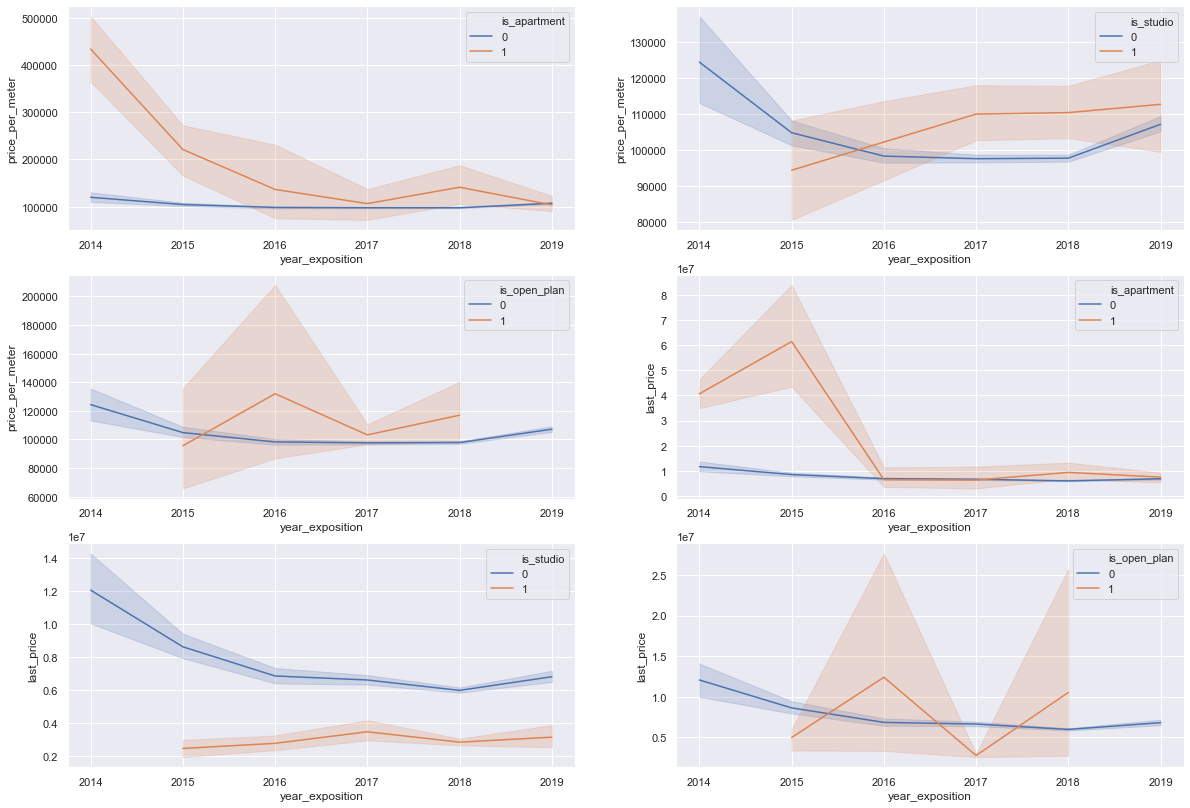

In [115]:
f, ax = plt.subplots(3,2, figsize = (20,14))
sns.lineplot(x=df.year_exposition, y=df.price_per_meter,
             hue=df.is_apartment, ax=ax[0,0])

sns.lineplot(x=df.year_exposition, y=df.price_per_meter,
             hue=df.is_studio, ax=ax[0,1])

sns.lineplot(x=df.year_exposition, y=df.price_per_meter,
             hue=df.is_open_plan, ax=ax[1,0])

sns.lineplot(x=df.year_exposition, y=df.last_price,
             hue=df.is_apartment, ax=ax[1,1])

sns.lineplot(x=df.year_exposition, y=df.last_price,
             hue=df.is_studio, ax=ax[2,0])

sns.lineplot(x=df.year_exposition, y=df.last_price,
             hue=df.is_open_plan, ax=ax[2,1])
plt.show()

In [116]:
view_apartments = pd.DataFrame({
    'Апартаменты':  apartment.iloc[12],
    'Студии': studio.iloc[12],
    'Открытой планировки': open_plan.iloc[12],
    'Типичная планировка': typical.iloc[12]
}).reset_index()

view_apartments.style.background_gradient('coolwarm')

,index,Апартаменты,Студии,Открытой планировки,Типичная планировка
0,total_area_m2,0.810846,0.853328,0.959663,0.651997
1,living_area_m2,0.832499,0.741941,0.828737,0.564243
2,kitchen_area_m2,0.698444,nan,nan,0.518186
3,ceiling_height_m,0.024100,0.410452,-0.047864,0.112706
4,number_of_rooms,0.399182,-0.050364,0.388753,0.364555
5,number_of_balconies,-0.242726,0.017074,-0.342310,0.031506
6,floor,0.119855,-0.045915,-0.084180,0.028833
7,total_floors_in_house,-0.089131,-0.137154,-0.216211,-0.002932
8,is_apartment,nan,nan,nan,nan
9,is_studio,nan,nan,nan,nan


Вывод:
- Для каждого вида планировки наибольшее влияние оказывают:
  - все виды площадей квартиры;
  - цена за квадратный метр;
  - расстояние до центра города (чем ближе к центру, тем выше цена);
- Для Апартаментов характерно:
  - количество балконов (судя по корреляции чем больше балконов в апартаментах тем меньше их цена);
  - год объявления (видимо год объявления оказывает влияние на цену);
  - количество комнат;
  - парки и пруды в ближайшей доступности;
- Для студий характерно:
  - высота потолков (так как студии, как правило, общую жилую площадь имеют небольшую, то для организации своего жилого помещения размещают мебель не по площади помещения, а по его высоте);
  - количестов этажей в доме (чем больше этажей, тем меньше цена);
- Для квартир открытой планировки:
  - количество комнат;
  - количество балконов (чем больше балконов, тем меньше цена квартиры);
  - количество этажей в доме (чем больше этажей, тем меньше цена);
  - парки и пруды в ближайшей доступности;
- Для типичных квартир каких-то явных отличительных признаков с другими видами планировки не наблюдается

### Общий вывод:

- Дороже всего квартиры в Санкт - Петербурге, дешевле всего в Выборке;
- Чем квартира ближе к центру, тем ее цена значительно возрастает;
- На 2019 год цена за квадратный метр оказалась меньше всего у апартаментов, выше всего у квартир с открытой планировкой;
- Общая цена за квартиру значительно меньше у студий, выше всех у апартаментов;
- Типичные признаки влияющие на ценовую политику:
  - площадь квартиры;
  - цена за квадратный метр;
  - расстояние до центра города;
- В зависимости от приближенности или удаленности к центру города типичные признаки следцющие:
  - цена за квадратный метр;
  - площадь квартиры;
  - количество комнат;
  - количество балконов (характерно для квартир, находящихся на удалении от центра города);
- Так же немало важное значение оказывают такие признаки как:
  - количество этажей в доме (чем их больше, тем ниже цена);
  - пруды и парки поблизости (особенно значимо для аппартаментов и квартир с открытой планировкой - как правило такие квартиры покупают люди семейный и у них в приорите чистый воздух, место для вечерних прогулок);
  - высота потолков (так как студии, как правило, общую жилую площадь имеют небольшую, то для организации своего жилого помещения размещают мебель не по площади помещения, а по его высоте);